In [27]:
#Importing Libraries
import pandas as pd
import random
import pickle
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.preprocessing import LabelEncoder

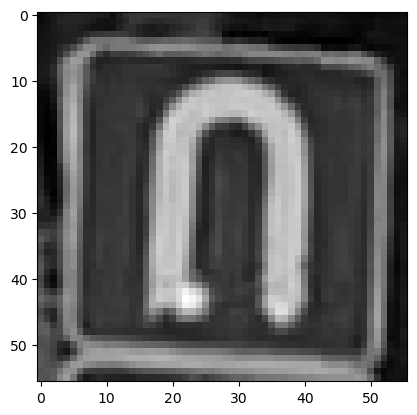

In [28]:
DATADIR = 'data/TRAIN'
CATEGORIES = ['INFO', 'MANDATORY', 'PROHIBITORY', 'WARNING','DIRECTIONAL','EMAS']
    
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
#       img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img, cmap='gray')
        plt.show()
        break
    break




In [29]:
print(img.shape)

(56, 56)


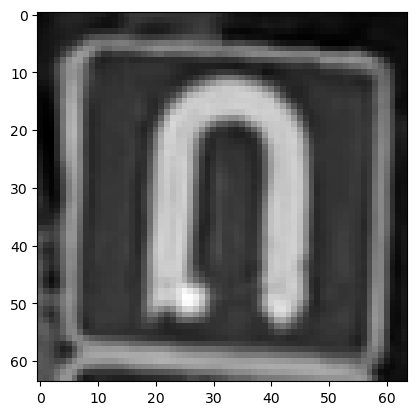

In [30]:
IMG_SIZE = 64

new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [31]:
print(new_array.shape)

(64, 64)


In [32]:
def create_training_data(img_size = 64):
    IMG_SIZE = img_size
    training_data = []
    DATADIR = 'data/TRAIN'
    CATEGORIES = ['INFO', 'MANDATORY', 'PROHIBITORY', 'WARNING','DIRECTIONAL','EMAS']
    for category in CATEGORIES:
        class_num = CATEGORIES.index(category)
        path = os.path.join(DATADIR,category)
        for img in os.listdir(path):
            try:
                print(path, img)
                img = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(img, e)
                pass
                    
    return training_data

In [33]:
IMG_SIZE = 64
train_data = create_training_data(64)

data/TRAIN\INFO 0205.jpg
data/TRAIN\INFO 0207.jpg
data/TRAIN\INFO 0209.jpg
data/TRAIN\INFO 0249.jpg
data/TRAIN\INFO 0250.jpg
data/TRAIN\INFO 0251.jpg
data/TRAIN\INFO 0252.jpg
data/TRAIN\INFO 0281.jpg
data/TRAIN\INFO 0284.jpg
data/TRAIN\INFO 0292.jpg
data/TRAIN\INFO 0294.jpg
data/TRAIN\INFO 0295.jpg
data/TRAIN\INFO 0356.jpg
data/TRAIN\INFO 0357.jpg
data/TRAIN\INFO 0378.jpg
data/TRAIN\INFO 0379.jpg
data/TRAIN\INFO 0430.jpg
data/TRAIN\INFO 0457.jpg
data/TRAIN\INFO 0460.jpg
data/TRAIN\INFO 0463.jpg
data/TRAIN\INFO 0466.jpg
data/TRAIN\INFO 0470.jpg
data/TRAIN\INFO 0510.jpg
data/TRAIN\INFO 0516.jpg
data/TRAIN\INFO 0539.jpg
data/TRAIN\INFO 0542.jpg
data/TRAIN\INFO 0547.jpg
data/TRAIN\INFO 0549.jpg
data/TRAIN\INFO 0551.jpg
data/TRAIN\INFO 0553.jpg
data/TRAIN\INFO 0555.jpg
data/TRAIN\INFO 0588.jpg
data/TRAIN\INFO 0592.jpg
data/TRAIN\INFO 0596.jpg
data/TRAIN\INFO 0598.jpg
data/TRAIN\INFO 0602.jpg
data/TRAIN\INFO 0607.jpg
data/TRAIN\INFO 0749.jpg
data/TRAIN\INFO 0750.jpg
data/TRAIN\INFO 0752.jpg


data/TRAIN\INFO 3587.jpg
data/TRAIN\INFO 3596.jpg
data/TRAIN\INFO 3598.jpg
data/TRAIN\INFO 3602.jpg
data/TRAIN\INFO 3635.jpg
data/TRAIN\INFO 3638.jpg
data/TRAIN\INFO 3641.jpg
data/TRAIN\INFO 3644.jpg
data/TRAIN\INFO 3647.jpg
data/TRAIN\INFO 3650.jpg
data/TRAIN\INFO 3653.jpg
data/TRAIN\INFO 3656.jpg
data/TRAIN\INFO 3658.jpg
data/TRAIN\INFO 3660.jpg
data/TRAIN\INFO 3662.jpg
data/TRAIN\INFO 3664.jpg
data/TRAIN\INFO 3666.jpg
data/TRAIN\INFO 3694.jpg
data/TRAIN\INFO 3695.jpg
data/TRAIN\INFO 3696.jpg
data/TRAIN\INFO 3697.jpg
data/TRAIN\INFO 3698.jpg
data/TRAIN\INFO 3703.jpg
data/TRAIN\INFO 3704.jpg
data/TRAIN\INFO 3709.jpg
data/TRAIN\INFO 3713.jpg
data/TRAIN\INFO 3714.jpg
data/TRAIN\INFO 3715.jpg
data/TRAIN\INFO 3716.jpg
data/TRAIN\INFO 3718.jpg
data/TRAIN\INFO 3728.jpg
data/TRAIN\INFO 3729.jpg
data/TRAIN\INFO 3730.jpg
data/TRAIN\INFO 3731.jpg
data/TRAIN\INFO 3738.jpg
data/TRAIN\INFO 3739.jpg
data/TRAIN\INFO 3740.jpg
data/TRAIN\INFO 3741.jpg
data/TRAIN\INFO 3742.jpg
data/TRAIN\INFO 3744.jpg


data/TRAIN\INFO 5631.jpg
data/TRAIN\INFO 5632.jpg
data/TRAIN\INFO 5633.jpg
data/TRAIN\INFO 5634.jpg
data/TRAIN\INFO 5635.jpg
data/TRAIN\INFO 5636.jpg
data/TRAIN\INFO 5637.jpg
data/TRAIN\INFO 5638.jpg
data/TRAIN\INFO 5639.jpg
data/TRAIN\INFO 5640.jpg
data/TRAIN\INFO 5641.jpg
data/TRAIN\INFO 5642.jpg
data/TRAIN\INFO 5643.jpg
data/TRAIN\INFO 5647.jpg
data/TRAIN\INFO 5648.jpg
data/TRAIN\INFO 5649.jpg
data/TRAIN\INFO 5650.jpg
data/TRAIN\INFO 5651.jpg
data/TRAIN\INFO 5652.jpg
data/TRAIN\INFO 5654.jpg
data/TRAIN\INFO 5655.jpg
data/TRAIN\INFO 5656.jpg
data/TRAIN\INFO 5658.jpg
data/TRAIN\INFO 5670.jpg
data/TRAIN\INFO 5673.jpg
data/TRAIN\INFO 5674.jpg
data/TRAIN\INFO 5675.jpg
data/TRAIN\INFO 5681.jpg
data/TRAIN\INFO 5682.jpg
data/TRAIN\INFO 5684.jpg
data/TRAIN\INFO 5715.jpg
data/TRAIN\INFO 5719.jpg
data/TRAIN\INFO 5723.jpg
data/TRAIN\INFO 5741.jpg
data/TRAIN\INFO 5744.jpg
data/TRAIN\INFO 5749.jpg
data/TRAIN\INFO 5755.jpg
data/TRAIN\INFO 5757.jpg
data/TRAIN\INFO 5763.jpg
data/TRAIN\INFO 5773.jpg


data/TRAIN\MANDATORY 3779.jpg
data/TRAIN\MANDATORY 3782.jpg
data/TRAIN\MANDATORY 3801.jpg
data/TRAIN\MANDATORY 3805.jpg
data/TRAIN\MANDATORY 3815.jpg
data/TRAIN\MANDATORY 3817.jpg
data/TRAIN\MANDATORY 3819.jpg
data/TRAIN\MANDATORY 3820.jpg
data/TRAIN\MANDATORY 3822.jpg
data/TRAIN\MANDATORY 3824.jpg
data/TRAIN\MANDATORY 3825.jpg
data/TRAIN\MANDATORY 3826.jpg
data/TRAIN\MANDATORY 3827.jpg
data/TRAIN\MANDATORY 3836.jpg
data/TRAIN\MANDATORY 3848.jpg
data/TRAIN\MANDATORY 3849.jpg
data/TRAIN\MANDATORY 3850.jpg
data/TRAIN\MANDATORY 3851.jpg
data/TRAIN\MANDATORY 3852.jpg
data/TRAIN\MANDATORY 3856.jpg
data/TRAIN\MANDATORY 3862.jpg
data/TRAIN\MANDATORY 3863.jpg
data/TRAIN\MANDATORY 3864.jpg
data/TRAIN\MANDATORY 3900.jpg
data/TRAIN\MANDATORY 3901.jpg
data/TRAIN\MANDATORY 3902.jpg
data/TRAIN\MANDATORY 3903.jpg
data/TRAIN\MANDATORY 3904.jpg
data/TRAIN\MANDATORY 3905.jpg
data/TRAIN\MANDATORY 3906.jpg
data/TRAIN\MANDATORY 3907.jpg
data/TRAIN\MANDATORY 3908.jpg
data/TRAIN\MANDATORY 3909.jpg
data/TRAIN

data/TRAIN\PROHIBITORY 1588.jpg
data/TRAIN\PROHIBITORY 1631.jpg
data/TRAIN\PROHIBITORY 1634.jpg
data/TRAIN\PROHIBITORY 1637.jpg
data/TRAIN\PROHIBITORY 1640.jpg
data/TRAIN\PROHIBITORY 1643.jpg
data/TRAIN\PROHIBITORY 1646.jpg
data/TRAIN\PROHIBITORY 1649.jpg
data/TRAIN\PROHIBITORY 1652.jpg
data/TRAIN\PROHIBITORY 1655.jpg
data/TRAIN\PROHIBITORY 1658.jpg
data/TRAIN\PROHIBITORY 1667.jpg
data/TRAIN\PROHIBITORY 1669.jpg
data/TRAIN\PROHIBITORY 1671.jpg
data/TRAIN\PROHIBITORY 1685.jpg
data/TRAIN\PROHIBITORY 1687.jpg
data/TRAIN\PROHIBITORY 1715.jpg
data/TRAIN\PROHIBITORY 1717.jpg
data/TRAIN\PROHIBITORY 1725.jpg
data/TRAIN\PROHIBITORY 1734.jpg
data/TRAIN\PROHIBITORY 1736.jpg
data/TRAIN\PROHIBITORY 1738.jpg
data/TRAIN\PROHIBITORY 1740.jpg
data/TRAIN\PROHIBITORY 1742.jpg
data/TRAIN\PROHIBITORY 1744.jpg
data/TRAIN\PROHIBITORY 1749.jpg
data/TRAIN\PROHIBITORY 1754.jpg
data/TRAIN\PROHIBITORY 1756.jpg
data/TRAIN\PROHIBITORY 1767.jpg
data/TRAIN\PROHIBITORY 1770.jpg
data/TRAIN\PROHIBITORY 1773.jpg
data/TRA

data/TRAIN\PROHIBITORY 3516.jpg
data/TRAIN\PROHIBITORY 3517.jpg
data/TRAIN\PROHIBITORY 3518.jpg
data/TRAIN\PROHIBITORY 3529.jpg
data/TRAIN\PROHIBITORY 3535.jpg
data/TRAIN\PROHIBITORY 3561.jpg
data/TRAIN\PROHIBITORY 3562.jpg
data/TRAIN\PROHIBITORY 3563.jpg
data/TRAIN\PROHIBITORY 3564.jpg
data/TRAIN\PROHIBITORY 3565.jpg
data/TRAIN\PROHIBITORY 3567.jpg
data/TRAIN\PROHIBITORY 3570.jpg
data/TRAIN\PROHIBITORY 3571.jpg
data/TRAIN\PROHIBITORY 3572.jpg
data/TRAIN\PROHIBITORY 3573.jpg
data/TRAIN\PROHIBITORY 3574.jpg
data/TRAIN\PROHIBITORY 3576.jpg
data/TRAIN\PROHIBITORY 3589.jpg
data/TRAIN\PROHIBITORY 3591.jpg
data/TRAIN\PROHIBITORY 3592.jpg
data/TRAIN\PROHIBITORY 3593.jpg
data/TRAIN\PROHIBITORY 3594.jpg
data/TRAIN\PROHIBITORY 3701.jpg
data/TRAIN\PROHIBITORY 3702.jpg
data/TRAIN\PROHIBITORY 3706.jpg
data/TRAIN\PROHIBITORY 3707.jpg
data/TRAIN\PROHIBITORY 3712.jpg
data/TRAIN\PROHIBITORY 3721.jpg
data/TRAIN\PROHIBITORY 3722.jpg
data/TRAIN\PROHIBITORY 3752.jpg
data/TRAIN\PROHIBITORY 3753.jpg
data/TRA

data/TRAIN\WARNING 0888.jpg
data/TRAIN\WARNING 0891.jpg
data/TRAIN\WARNING 0916.jpg
data/TRAIN\WARNING 0918.jpg
data/TRAIN\WARNING 0920.jpg
data/TRAIN\WARNING 0922.jpg
data/TRAIN\WARNING 0923.jpg
data/TRAIN\WARNING 0926.jpg
data/TRAIN\WARNING 0928.jpg
data/TRAIN\WARNING 0929.jpg
data/TRAIN\WARNING 0931.jpg
data/TRAIN\WARNING 0932.jpg
data/TRAIN\WARNING 0934.jpg
data/TRAIN\WARNING 0964.jpg
data/TRAIN\WARNING 1031.jpg
data/TRAIN\WARNING 1034.jpg
data/TRAIN\WARNING 1041.jpg
data/TRAIN\WARNING 1049.jpg
data/TRAIN\WARNING 1051.jpg
data/TRAIN\WARNING 1053.jpg
data/TRAIN\WARNING 1241.jpg
data/TRAIN\WARNING 1246.jpg
data/TRAIN\WARNING 1251.jpg
data/TRAIN\WARNING 1254.jpg
data/TRAIN\WARNING 1286.jpg
data/TRAIN\WARNING 1289.jpg
data/TRAIN\WARNING 1291.jpg
data/TRAIN\WARNING 1295.jpg
data/TRAIN\WARNING 1298.jpg
data/TRAIN\WARNING 1337.jpg
data/TRAIN\WARNING 1339.jpg
data/TRAIN\WARNING 1341.jpg
data/TRAIN\WARNING 1342.jpg
data/TRAIN\WARNING 1345.jpg
data/TRAIN\WARNING 1347.jpg
data/TRAIN\WARNING 1

data/TRAIN\WARNING 3981.jpg
data/TRAIN\WARNING 3982.jpg
data/TRAIN\WARNING 3987.jpg
data/TRAIN\WARNING 3988.jpg
data/TRAIN\WARNING 3990.jpg
data/TRAIN\WARNING 3991.jpg
data/TRAIN\WARNING 3994.jpg
data/TRAIN\WARNING 3995.jpg
data/TRAIN\WARNING 4038.jpg
data/TRAIN\WARNING 4040.jpg
data/TRAIN\WARNING 4042.jpg
data/TRAIN\WARNING 4044.jpg
data/TRAIN\WARNING 4046.jpg
data/TRAIN\WARNING 4048.jpg
data/TRAIN\WARNING 4051.jpg
data/TRAIN\WARNING 4054.jpg
data/TRAIN\WARNING 4056.jpg
data/TRAIN\WARNING 4058.jpg
data/TRAIN\WARNING 4059.jpg
data/TRAIN\WARNING 4060.jpg
data/TRAIN\WARNING 4061.jpg
data/TRAIN\WARNING 4062.jpg
data/TRAIN\WARNING 4205.jpg
data/TRAIN\WARNING 4207.jpg
data/TRAIN\WARNING 4210.jpg
data/TRAIN\WARNING 4212.jpg
data/TRAIN\WARNING 4214.jpg
data/TRAIN\WARNING 4215.jpg
data/TRAIN\WARNING 4224.jpg
data/TRAIN\WARNING 4245.jpg
data/TRAIN\WARNING 4246.jpg
data/TRAIN\WARNING 4247.jpg
data/TRAIN\WARNING 4249.jpg
data/TRAIN\WARNING 4258.jpg
data/TRAIN\WARNING 4260.jpg
data/TRAIN\WARNING 4

data/TRAIN\EMAS emas10.png
data/TRAIN\EMAS emas11 - Copy (2).jpg
data/TRAIN\EMAS emas11 - Copy (3).jpg
data/TRAIN\EMAS emas11 - Copy (4).jpg
data/TRAIN\EMAS emas11 - Copy (5).jpg
data/TRAIN\EMAS emas11 - Copy (6).jpg
data/TRAIN\EMAS emas11 - Copy (7).jpg
data/TRAIN\EMAS emas11 - Copy.jpg
data/TRAIN\EMAS emas11.jpg
data/TRAIN\EMAS emas12 - Copy (2).jpg
data/TRAIN\EMAS emas12 - Copy (3).jpg
data/TRAIN\EMAS emas12 - Copy (4).jpg
data/TRAIN\EMAS emas12 - Copy (5).jpg
data/TRAIN\EMAS emas12 - Copy (6).jpg
data/TRAIN\EMAS emas12 - Copy (7).jpg
data/TRAIN\EMAS emas12 - Copy.jpg
data/TRAIN\EMAS emas12.jpg
data/TRAIN\EMAS emas13 - Copy (2).png
data/TRAIN\EMAS emas13 - Copy (3).png
data/TRAIN\EMAS emas13 - Copy (4).png
data/TRAIN\EMAS emas13 - Copy (5).png
data/TRAIN\EMAS emas13 - Copy (6).png
data/TRAIN\EMAS emas13 - Copy (7).png
data/TRAIN\EMAS emas13 - Copy.png
data/TRAIN\EMAS emas13.png
data/TRAIN\EMAS emas14 - Copy (2).png
data/TRAIN\EMAS emas14 - Copy (3).png
data/TRAIN\EMAS emas14 - Copy 

In [34]:
print(len(train_data))

2986


In [35]:
random.seed(19)
random.shuffle(train_data)

In [36]:
for sample in train_data[:10]:
    print(sample[1])

3
2
2
2
3
3
2
3
2
0


In [37]:
X = []
y = []
for features, label in train_data:
    X.append(features)
    y.append(label)
print(X[:10])
print(y[:10])

[array([[164, 136, 139, ..., 146, 141,  40],
       [158, 132, 139, ..., 151,  97,  41],
       [152, 127, 144, ..., 136,  26,  34],
       ...,
       [154, 166, 176, ...,  31,  31,  40],
       [111, 182, 175, ...,  28,  29,  34],
       [149, 173, 169, ...,  23,  30,  28]], dtype=uint8), array([[103, 134, 148, ...,  50,  59,  67],
       [224, 255, 246, ...,  53,  56,  68],
       [253, 250, 245, ...,  49,  48,  82],
       ...,
       [ 63, 173, 129, ...,  48,  43,  42],
       [ 61, 201,  78, ...,  47,  45,  46],
       [162, 161,  99, ...,  51,  51,  57]], dtype=uint8), array([[38, 39, 39, ..., 63, 62, 62],
       [38, 38, 38, ..., 61, 63, 65],
       [38, 38, 38, ..., 61, 62, 62],
       ...,
       [54, 40, 38, ..., 64, 64, 64],
       [52, 48, 45, ..., 64, 64, 64],
       [53, 47, 45, ..., 64, 64, 64]], dtype=uint8), array([[148, 148, 149, ...,  67,  68,  64],
       [148, 148, 149, ...,  68,  68,  68],
       [148, 148, 148, ...,  68,  68,  67],
       ...,
       [137, 149, 

In [38]:
X[0].shape

(64, 64)

In [39]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X[0].shape

(64, 64, 1)

In [40]:
y = np.array(y)

In [41]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [42]:
def create_test_data(img_size = 64):
    IMG_SIZE = img_size
    test_data = []
    DATADIR = 'data/TEST'
    CATEGORIES = ['INFO', 'MANDATORY', 'PROHIBITORY', 'WARNING','DIRECTIONAL','EMAS']
    for category in CATEGORIES:
        class_num = CATEGORIES.index(category)
        path = os.path.join(DATADIR,category)
        for img in os.listdir(path):
            try:
                print(path, img)
                img = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                test_data.append([new_array, class_num])
            except Exception as e:
                print(img, e)
                pass
                    
    return test_data

In [43]:
test_data = create_test_data()

data/TEST\INFO 0097.jpg
data/TEST\INFO 0282.jpg
data/TEST\INFO 0358.jpg
data/TEST\INFO 0380.jpg
data/TEST\INFO 0431.jpg
data/TEST\INFO 0459.jpg
data/TEST\INFO 0529.jpg
data/TEST\INFO 0533.jpg
data/TEST\INFO 0545.jpg
data/TEST\INFO 0552.jpg
data/TEST\INFO 0556.jpg
data/TEST\INFO 0604.jpg
data/TEST\INFO 0745.jpg
data/TEST\INFO 0751.jpg
data/TEST\INFO 1019.jpg
data/TEST\INFO 1086.jpg
data/TEST\INFO 1104.jpg
data/TEST\INFO 1130.jpg
data/TEST\INFO 1169.jpg
data/TEST\INFO 1225.jpg
data/TEST\INFO 1226.jpg
data/TEST\INFO 1255.jpg
data/TEST\INFO 1259.jpg
data/TEST\INFO 1263.jpg
data/TEST\INFO 1551.jpg
data/TEST\INFO 1555.jpg
data/TEST\INFO 1639.jpg
data/TEST\INFO 1645.jpg
data/TEST\INFO 1698.jpg
data/TEST\INFO 1706.jpg
data/TEST\INFO 1708.jpg
data/TEST\INFO 1721.jpg
data/TEST\INFO 1774.jpg
data/TEST\INFO 1841.jpg
data/TEST\INFO 1843.jpg
data/TEST\INFO 1876.jpg
data/TEST\INFO 1889.jpg
data/TEST\INFO 1905.jpg
data/TEST\INFO 1909.jpg
data/TEST\INFO 1925.jpg
data/TEST\INFO 2061.jpg
data/TEST\INFO 2

data/TEST\WARNING 4571.jpg
data/TEST\WARNING 4593.jpg
data/TEST\WARNING 4596.jpg
data/TEST\WARNING 4615.jpg
data/TEST\WARNING 4729.jpg
data/TEST\WARNING 4735.jpg
data/TEST\WARNING 4826.jpg
data/TEST\WARNING 4828.jpg
data/TEST\WARNING 4927.jpg
data/TEST\WARNING 4947.jpg
data/TEST\WARNING 4949.jpg
data/TEST\WARNING 4954.jpg
data/TEST\WARNING 4967.jpg
data/TEST\WARNING 5017.jpg
data/TEST\WARNING 5020.jpg
data/TEST\WARNING 5182.jpg
data/TEST\WARNING 5202.jpg
data/TEST\WARNING 5242.jpg
data/TEST\WARNING 5339.jpg
data/TEST\WARNING 5445.jpg
data/TEST\WARNING 5473.jpg
data/TEST\WARNING 5536.jpg
data/TEST\DIRECTIONAL dir1 - Copy (2).png
data/TEST\DIRECTIONAL dir1 - Copy - Copy.png
data/TEST\DIRECTIONAL dir1 - Copy.png
data/TEST\DIRECTIONAL dir1.png
data/TEST\DIRECTIONAL dir2 - Copy (2).png
data/TEST\DIRECTIONAL dir2 - Copy - Copy.png
data/TEST\DIRECTIONAL dir2 - Copy.png
data/TEST\DIRECTIONAL dir2.png
data/TEST\EMAS emas1 - Copy (2).jpeg
data/TEST\EMAS emas1 - Copy (3).jpeg
data/TEST\EMAS emas1

In [44]:
random.seed(19)
random.shuffle(test_data)

In [45]:
for sample in test_data[:10]:
    print(sample[1])

3
1
3
1
2
3
3
2
3
0


In [46]:
X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
print(X_test[:10])
print(y_test[:10])

[array([[ 39,  40,  53, ...,  68,  65,  68],
       [103, 116, 116, ...,  50,  63,  75],
       [ 93,  77,  69, ...,  60,  71,  70],
       ...,
       [ 92,  94,  90, ...,  71,  70,  66],
       [ 90,  93,  91, ..., 108,  94,  72],
       [ 88,  89,  88, ...,  75,  76,  62]], dtype=uint8), array([[ 50,  46,  46, ...,  48,  49,  45],
       [ 76,  78,  67, ...,  50,  49,  43],
       [ 42,  48,  60, ...,  48,  44,  43],
       ...,
       [ 46,  42,  49, ..., 211, 215, 217],
       [ 48,  65,  66, ..., 192, 194, 196],
       [ 49,  95, 104, ..., 192, 189, 189]], dtype=uint8), array([[110, 110, 105, ..., 151, 129, 109],
       [108, 109, 105, ..., 135, 111, 103],
       [105, 106, 104, ..., 123, 107, 102],
       ...,
       [ 95,  98,  99, ..., 120,  82,  86],
       [ 96,  99, 100, ..., 101,  82,  83],
       [ 95,  95,  98, ...,  89,  79,  80]], dtype=uint8), array([[199, 185, 184, ..., 138, 200,  72],
       [189, 184, 185, ..., 140, 183,  82],
       [190, 188, 185, ..., 124, 122, 

In [47]:
X_test[0].shape

(64, 64)

In [48]:
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test[0].shape

(64, 64, 1)

In [49]:
y_test = np.array(y_test)

In [50]:
pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()